<a href="https://colab.research.google.com/github/xper100/Coursera/blob/main/%EB%B0%95%EC%A3%BC%EC%9C%A4_1%EC%B0%A8%EC%A0%9C%EC%B6%9C_%5Bn113%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 1 / NOTE 4*

# 📝 Assignment





## 1. 아래 링크와 이미지를 참조하여 차트를 그리세요 ( `seaborn` 사용 )

<https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv>

- 차트는 총 4가지를 그리게 됩니다.



In [1]:
import pandas as pd

df = pd.read_csv('https://github.com/mwaskom/seaborn-data/raw/master/penguins.csv')

* **Deal with missing values**

In [2]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df.shape

(344, 7)

In [5]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [6]:
df[df.isnull().any(axis = 1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [7]:
if df.isnull().sum().sum() != 0:
  df.dropna(thresh = 0.5*df.shape[1], axis = 0, inplace = True)
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
dtype: int64

In [8]:
# Create a new feature aggregated with both species and island
df['species_island'] = df.agg(lambda x: f"{x['species']}_{x['island']}", axis = 1)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_island
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,Adelie_Torgersen
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,Adelie_Torgersen
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,Adelie_Torgersen
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,Adelie_Torgersen
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,Adelie_Torgersen


In [9]:
df1 = df[['species_island','sex']]
df1.head()

,species_island,sex
0,Adelie_Torgersen,MALE
1,Adelie_Torgersen,FEMALE
2,Adelie_Torgersen,FEMALE
4,Adelie_Torgersen,FEMALE
5,Adelie_Torgersen,MALE


In [10]:
# To see the most frequnt sex in each category
counts = df1.value_counts()
counts

species_island    sex   
Gentoo_Biscoe     MALE      61
                  FEMALE    58
Chinstrap_Dream   MALE      34
                  FEMALE    34
Adelie_Dream      MALE      28
                  FEMALE    27
Adelie_Torgersen  FEMALE    24
                  MALE      23
Adelie_Biscoe     MALE      22
                  FEMALE    22
dtype: int64

In [11]:
dictionary = {"Gentoo_Biscoe": "MALE", "Chinstrap_Dream": "MALE", "Adelie_Dream": "MALE", "Adelie_Torgersen": "FEMALE","Adelie_Biscoe": "FEMALE"}
df['sex'].fillna(df['species_island'].map(dictionary), inplace = True) # fill NA with the most frequent element of each category
df.drop(['species_island'], axis = 1, inplace = True) # Remove 'species_island' column 
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## A. 

색상을 지정할때 쓰이는 값을 `color`라는 변수에 지정하세요.

<img src='https://i.imgur.com/ul32uGv.png'>

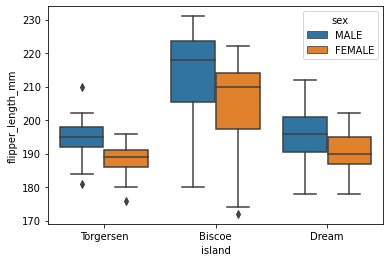

In [12]:
import seaborn as sns
import matplotlib as plt
color = 'sex'
sns.boxplot(x = 'island', y = 'flipper_length_mm', hue = color, data = df)


## B. 

order에 쓰이는 값을 `ord`에 저장하세요.

<img src='https://i.imgur.com/NNeUsoX.png'>

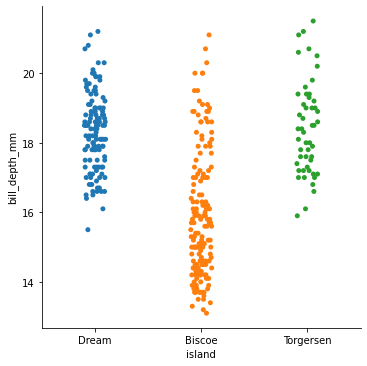

In [13]:
ord = ['Dream', 'Biscoe', 'Torgersen']
sns.catplot(x = 'island', y = 'bill_depth_mm', data = df, order = ord)

## C. 

- 다음 그래프를 그리기 위한 함수를 `plot`에 저장하세요. 

> sns.scatterplot()
> 
> sns.`~~~~`()

<img src='https://i.imgur.com/K5cNBfJ.png'>

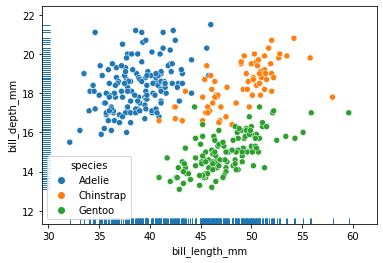

In [14]:
sns.scatterplot(x='bill_length_mm', y = 'bill_depth_mm', data=df, hue = "species")
sns.rugplot(x = "bill_length_mm", y = 'bill_depth_mm', data=df)

plot = 'rugplot'

## D.

<img src='https://i.imgur.com/i0izXcC.png'>

- 색상은 `#ff9ff3`, `#4000c7`, `#1dd1a1` 입니다.
- 코드에서 사용하는 `palette`의 값을 `pal`이라는 변수에 저장하세요.

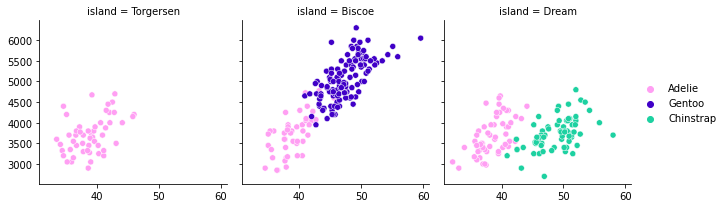

In [19]:
g = sns.FacetGrid(data = df, col = 'island')
pal = {"Adelie":'#ff9ff3', "Gentoo":"#4000c7", "Chinstrap":'#1dd1a1'}
g.map_dataframe(
    sns.scatterplot,
    x = 'bill_length_mm',
    y = 'body_mass_g',
    hue = 'species',
    data = df, 
    palette = pal
)
g.add_legend();

## Grading

이전 과제를 완료했다면, 아래의 코드를 실행하세요. 

In [20]:
import numpy as np

def grade():
  score = 0
  score += (color == 'sex') # A
  score += (ord == ['Dream', 'Biscoe', 'Torgersen']) # B
  score += (plot == 'rugplot') # C
  score += (pal == {"Adelie":'#ff9ff3', "Gentoo":"#4000c7", "Chinstrap":'#1dd1a1'}) # D 
  return(score)

In [21]:
grade()

4

## 🔥 도전과제



## 여러분은 핏빗 밴드를 설계하는 팀원입니다. 다음 차트를 기반으로, 앞으로 취해야할 전략을 간단하게 설명해보세요.
<https://public.tableau.com/ko-kr/gallery/year-watch-bands?tab=viz-of-the-day&type=viz-of-the-day>

<img src='https://i.imgur.com/bFWFNJF.png'>

* **색상 선호도**
1. Gray와 black을 굉장히 선호하는데 최근들어 튀는 색상을 찾기 시작함.
2. 앞으로 Neutral한 색상보다 **밝은 계열**을 더 찾음.
3. Neon Yellow나 비슷한 밝은 색상을 집중공략 - Pink(Red/Orange/Yellow)와 Aqua(Blue/Green)를 특히 집중

* **날씨 선호도**
1. 추위보단 더위를 많이 타는 사람인 듯 - 밴드를 차는 횟수가 더위와 반비례하는 경향이 있음
2. 10월부터 다시 밴드를 차려는 경향이 강해지는 중
3. 이 추세라면 앞으로 최소 4월달까지 이전보다 더 많은 횟수로 갈아낄 듯 - 최소4회이상.




